<a href="https://colab.research.google.com/github/M-ballabio1/MachineLearning-projects/blob/main/2.SP500%20(DecisionTreeRegressor).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mplcyberpunk

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
import mplcyberpunk
plt.style.use('cyberpunk')

In [ ]:
from google.colab import files
new = files.upload()

Saving AMZN_data.csv to AMZN_data.csv


In [ ]:
df = pd.read_csv('AMZN_data.csv', sep=',')
print(df)

            date     open     high       low    close    volume  Name
0     2013-02-08   261.40   265.25   260.555   261.95   3879078  AMZN
1     2013-02-11   263.20   263.25   256.600   257.21   3403403  AMZN
2     2013-02-12   259.19   260.16   257.000   258.70   2938660  AMZN
3     2013-02-13   261.53   269.96   260.300   269.47   5292996  AMZN
4     2013-02-14   267.37   270.65   265.400   269.24   3462780  AMZN
...          ...      ...      ...       ...      ...       ...   ...
1254  2018-02-01  1445.00  1459.88  1385.140  1390.00   9113808  AMZN
1255  2018-02-02  1477.39  1498.00  1414.000  1429.95  11125722  AMZN
1256  2018-02-05  1402.62  1458.98  1320.720  1390.00  11494985  AMZN
1257  2018-02-06  1361.46  1443.99  1351.790  1442.84  11066819  AMZN
1258  2018-02-07  1449.00  1460.99  1415.150  1416.78   7162741  AMZN

[1259 rows x 7 columns]


In [ ]:
df.drop(['date','Name'],1,inplace=True)

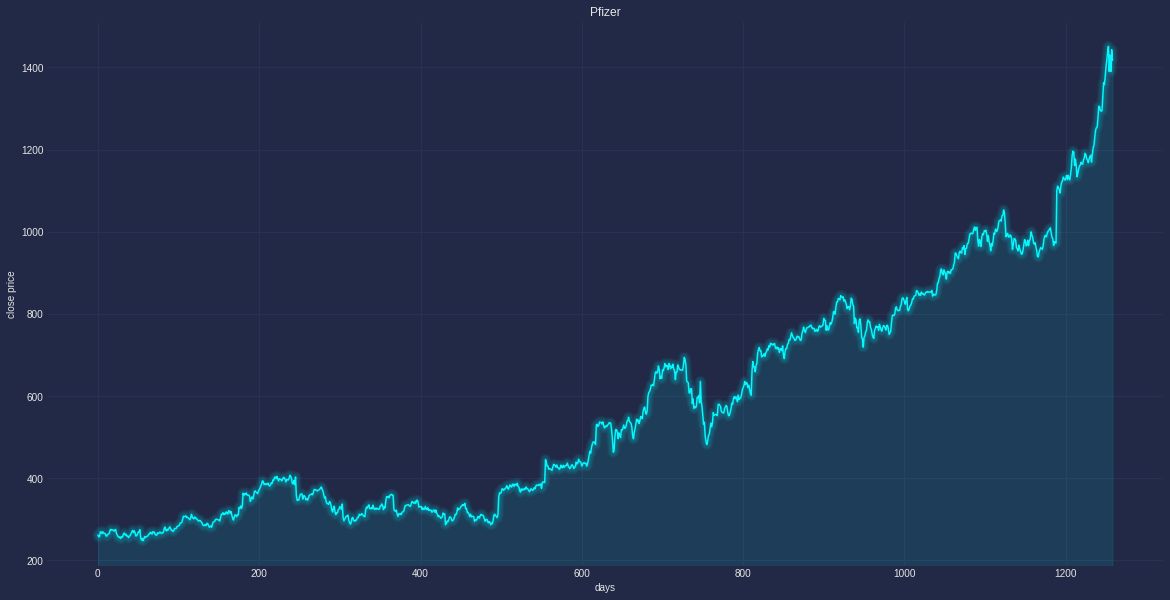

In [ ]:
#visualize the close price
plt.figure(figsize=(20,10))
plt.title('Pfizer')
plt.xlabel('days')
plt.ylabel('close price')
plt.plot(df['close'])
mplcyberpunk.add_glow_effects()
plt.show()

In [ ]:
df1 = df[['close']]
df1.head()

,close
0,261.95
1,257.21
2,258.70
3,269.47
4,269.24


In [ ]:
#number days to predict stock prices
future_days = 35
#new column target --> fondamentalmente creiamo una nuova colonna PREDICTION ottenuta shiftando la colonna "close" di 35 days perciò il prezzo di chiusura del 36 giorno di "close" finisce alla prima riga di "Prediction" 
df1['Prediction'] = df1[['close']].shift(-future_days)
df1.head()
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,close,Prediction
0,261.95,263.322
1,257.21,259.030
2,258.70,259.080
3,269.47,255.480
4,269.24,258.950
...,...,...
1254,1390.00,NaN
1255,1429.95,NaN
1256,1390.00,NaN
1257,1442.84,NaN


In [ ]:
#create features dataset (X) --> praticamente siamo andati a togliere dal dataset delle X gli ultimi 35 giorni.
X = np.array(df1.drop(['Prediction'],1))[:-future_days]
print(X)
X.shape  #infatti se notiamo nelle x mancano 35 rows

[[ 261.95]
 [ 257.21]
 [ 258.7 ]
 ...
 [1164.13]
 [1174.26]
 [1179.14]]


(1224, 1)

In [ ]:
#create the target (Y)
Y = np.array(df1['Prediction'])[:-future_days]
print(Y)
Y.shape

[ 263.322  259.03   259.08  ... 1390.    1442.84  1416.78 ]


(1224,)

In [ ]:
#Split data into 75% training and 25% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

In [ ]:
#Model for data --> dò in input X ed Y entrambe shape 1224 ossia mancanti degli ultimi 35 days cioè, quelli da prevedere.
model = DecisionTreeRegressor().fit(X_train, Y_train)
model1 = LinearRegression().fit(X_train, Y_train)

In [ ]:
#futures --> dò in input gli ultimi 35 valori di "close" del dataset X
x_future = df1.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future.size
x_future

array([[1100.95],
       [1110.85],
       [1105.28],
       [1103.68],
       [1094.22],
       [1111.6 ],
       [1120.66],
       [1123.17],
       [1132.88],
       [1129.13],
       [1125.35],
       [1129.17],
       [1136.84],
       [1126.69],
       [1137.29],
       [1129.88],
       [1126.31],
       [1139.49],
       [1156.16],
       [1186.  ],
       [1195.83],
       [1193.6 ],
       [1161.27],
       [1176.75],
       [1162.35],
       [1133.95],
       [1141.57],
       [1152.35],
       [1159.79],
       [1162.  ],
       [1168.92],
       [1165.08],
       [1164.13],
       [1174.26],
       [1179.14]])

In [ ]:
#model prediction --> utilizzando i 35 days prima dei 35 days da predire
model_prediction = model.predict(x_future)
print(model_prediction)
#model1 prediction -->same
model1_prediction = model1.predict(x_future)
print(model1_prediction)

[1190.58 1187.38 1177.62 1174.76 1168.36 1176.76 1182.26 1186.1  1169.47
 1189.01 1204.2  1189.01 1229.14 1246.87 1252.7  1254.33 1246.87 1305.2
 1304.86 1416.78 1293.32 1293.32 1450.89 1416.78 1450.89 1377.95 1305.2
 1417.68 1437.82 1450.89 1390.   1429.95 1390.   1442.84 1416.78]
[1167.73206615 1178.30136755 1172.354801   1170.64663108 1160.5470764
 1179.10207221 1188.7745844  1191.45427597 1201.8207322  1197.81720894
 1193.78165749 1197.85991319 1206.04845277 1195.21224981 1206.52887556
 1198.61791359 1194.80655945 1208.8776092  1226.6746046  1258.5319737
 1269.02654267 1266.64578084 1232.1300723  1248.65661632 1233.283087
 1202.96307084 1211.0982301  1222.60702497 1230.55001512 1232.90942483
 1240.29725975 1236.19765193 1235.18342604 1245.99827688 1251.20819515]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


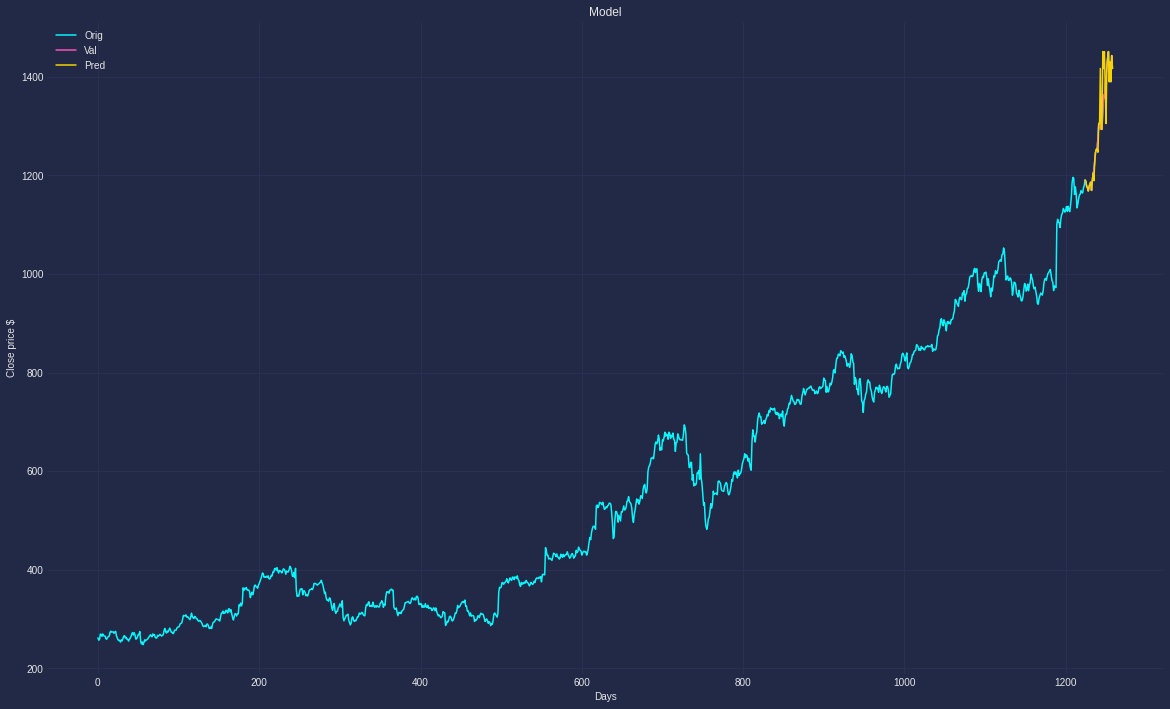

In [ ]:
#visualize data

predizioni = model_prediction

valid = df1[X.shape[0]:]

valid['Prediction'] = predizioni
plt.figure(figsize=(20,12))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price $')
plt.plot(df['close'])
plt.plot(valid[['close','Prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


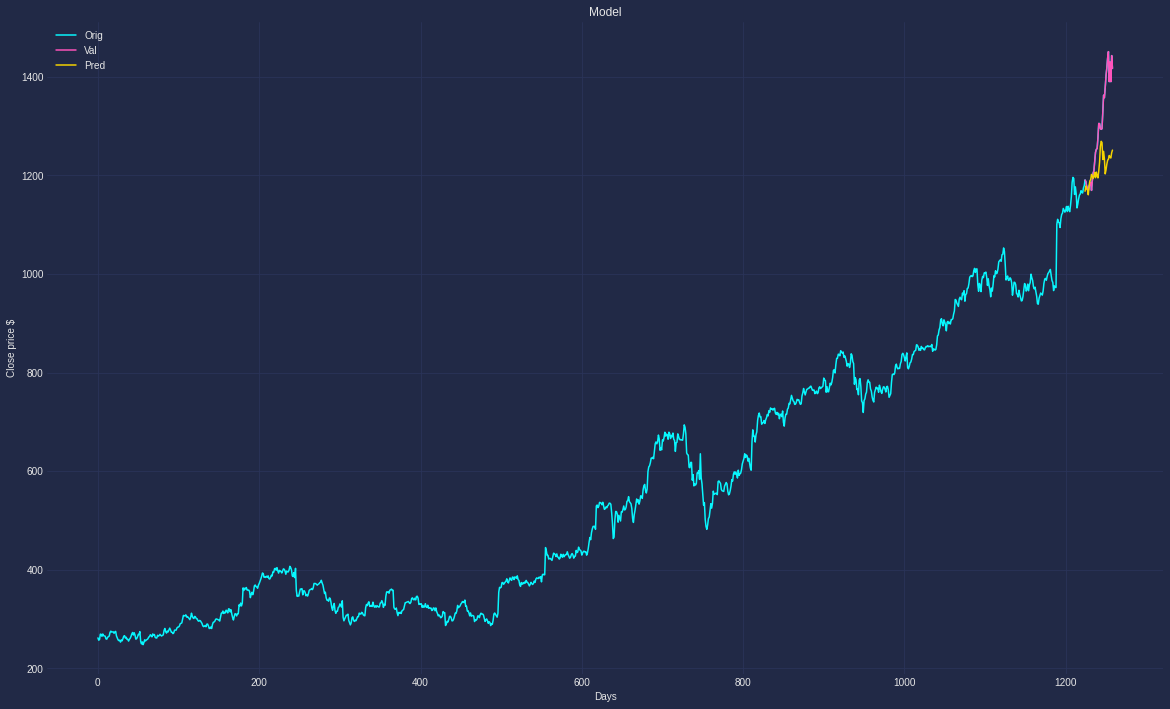

In [ ]:
#visualize data

predizioni1 = model1_prediction

valid = df1[X.shape[0]:]

valid['Prediction'] = predizioni1
plt.figure(figsize=(20,12))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price $')
plt.plot(df['close'])
plt.plot(valid[['close','Prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()

In [ ]:
#Decision Tree Model (Supervised Learning)
predizioni

array([1190.58, 1187.38, 1177.62, 1174.76, 1168.36, 1176.76, 1182.26,
       1186.1 , 1169.47, 1189.01, 1204.2 , 1189.01, 1229.14, 1246.87,
       1252.7 , 1254.33, 1246.87, 1305.2 , 1304.86, 1416.78, 1293.32,
       1293.32, 1450.89, 1416.78, 1450.89, 1377.95, 1305.2 , 1417.68,
       1437.82, 1450.89, 1390.  , 1429.95, 1390.  , 1442.84, 1416.78])

In [ ]:
valid = df1[X.shape[0]:]
valid.drop(['Prediction'],1,inplace=True)
valid

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,close
1224,1190.58
1225,1187.38
1226,1177.62
1227,1174.76
1228,1168.36
1229,1176.76
1230,1182.26
1231,1186.10
1232,1169.47
1233,1189.01


In [ ]:
#Linear Regression Model (Supervised Learning)
predizioni1

array([1167.73206615, 1178.30136755, 1172.354801  , 1170.64663108,
       1160.5470764 , 1179.10207221, 1188.7745844 , 1191.45427597,
       1201.8207322 , 1197.81720894, 1193.78165749, 1197.85991319,
       1206.04845277, 1195.21224981, 1206.52887556, 1198.61791359,
       1194.80655945, 1208.8776092 , 1226.6746046 , 1258.5319737 ,
       1269.02654267, 1266.64578084, 1232.1300723 , 1248.65661632,
       1233.283087  , 1202.96307084, 1211.0982301 , 1222.60702497,
       1230.55001512, 1232.90942483, 1240.29725975, 1236.19765193,
       1235.18342604, 1245.99827688, 1251.20819515])

In [ ]:
r2_score(valid, predizioni)

0.8352253404790676

In [ ]:
r2_score(valid, predizioni1)

-0.31467795346530214